Ustunlar ta'rifi
location - sotilayotgan uy manzili
district - uy joylashgan tuman
rooms - xonalar soni
size - uy maydoni (kv.m)
level - uy joylashgan qavat
max_levels - ja'mi qavatlar soni
price - uy narxi|

In [605]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [606]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [730]:
df=df.drop(columns="location")

In [611]:
price_o=df.loc[df["price"]=='Договорная'].index

In [612]:
#'Площадьземли:1сот
size_o=df.loc[df["size"]=='Площадьземли:1сот'].index

In [613]:
df=df.drop(index=size_o)
df=df.drop(index=price_o)

In [615]:
df["price"]=df["price"].astype("int64")

In [616]:
df["size"]=df["size"].astype("float64")

In [727]:
df.corrwith(df["price"]).sort_values(ascending=False)
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000


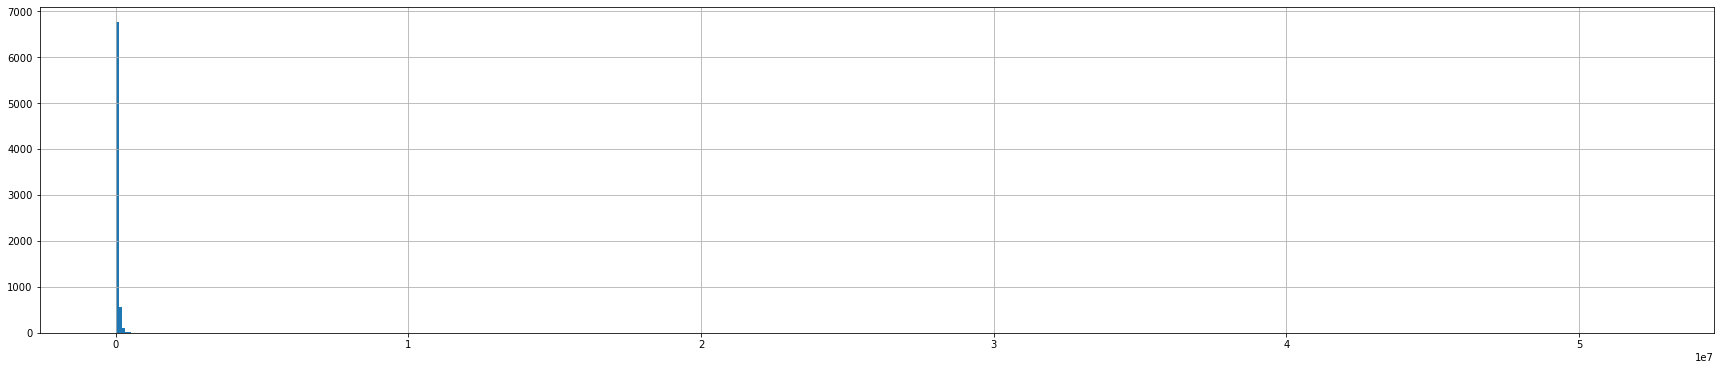

In [665]:
%matplotlib inline
df["price"].hist(bins=500, figsize=(30,6))
plt.show()

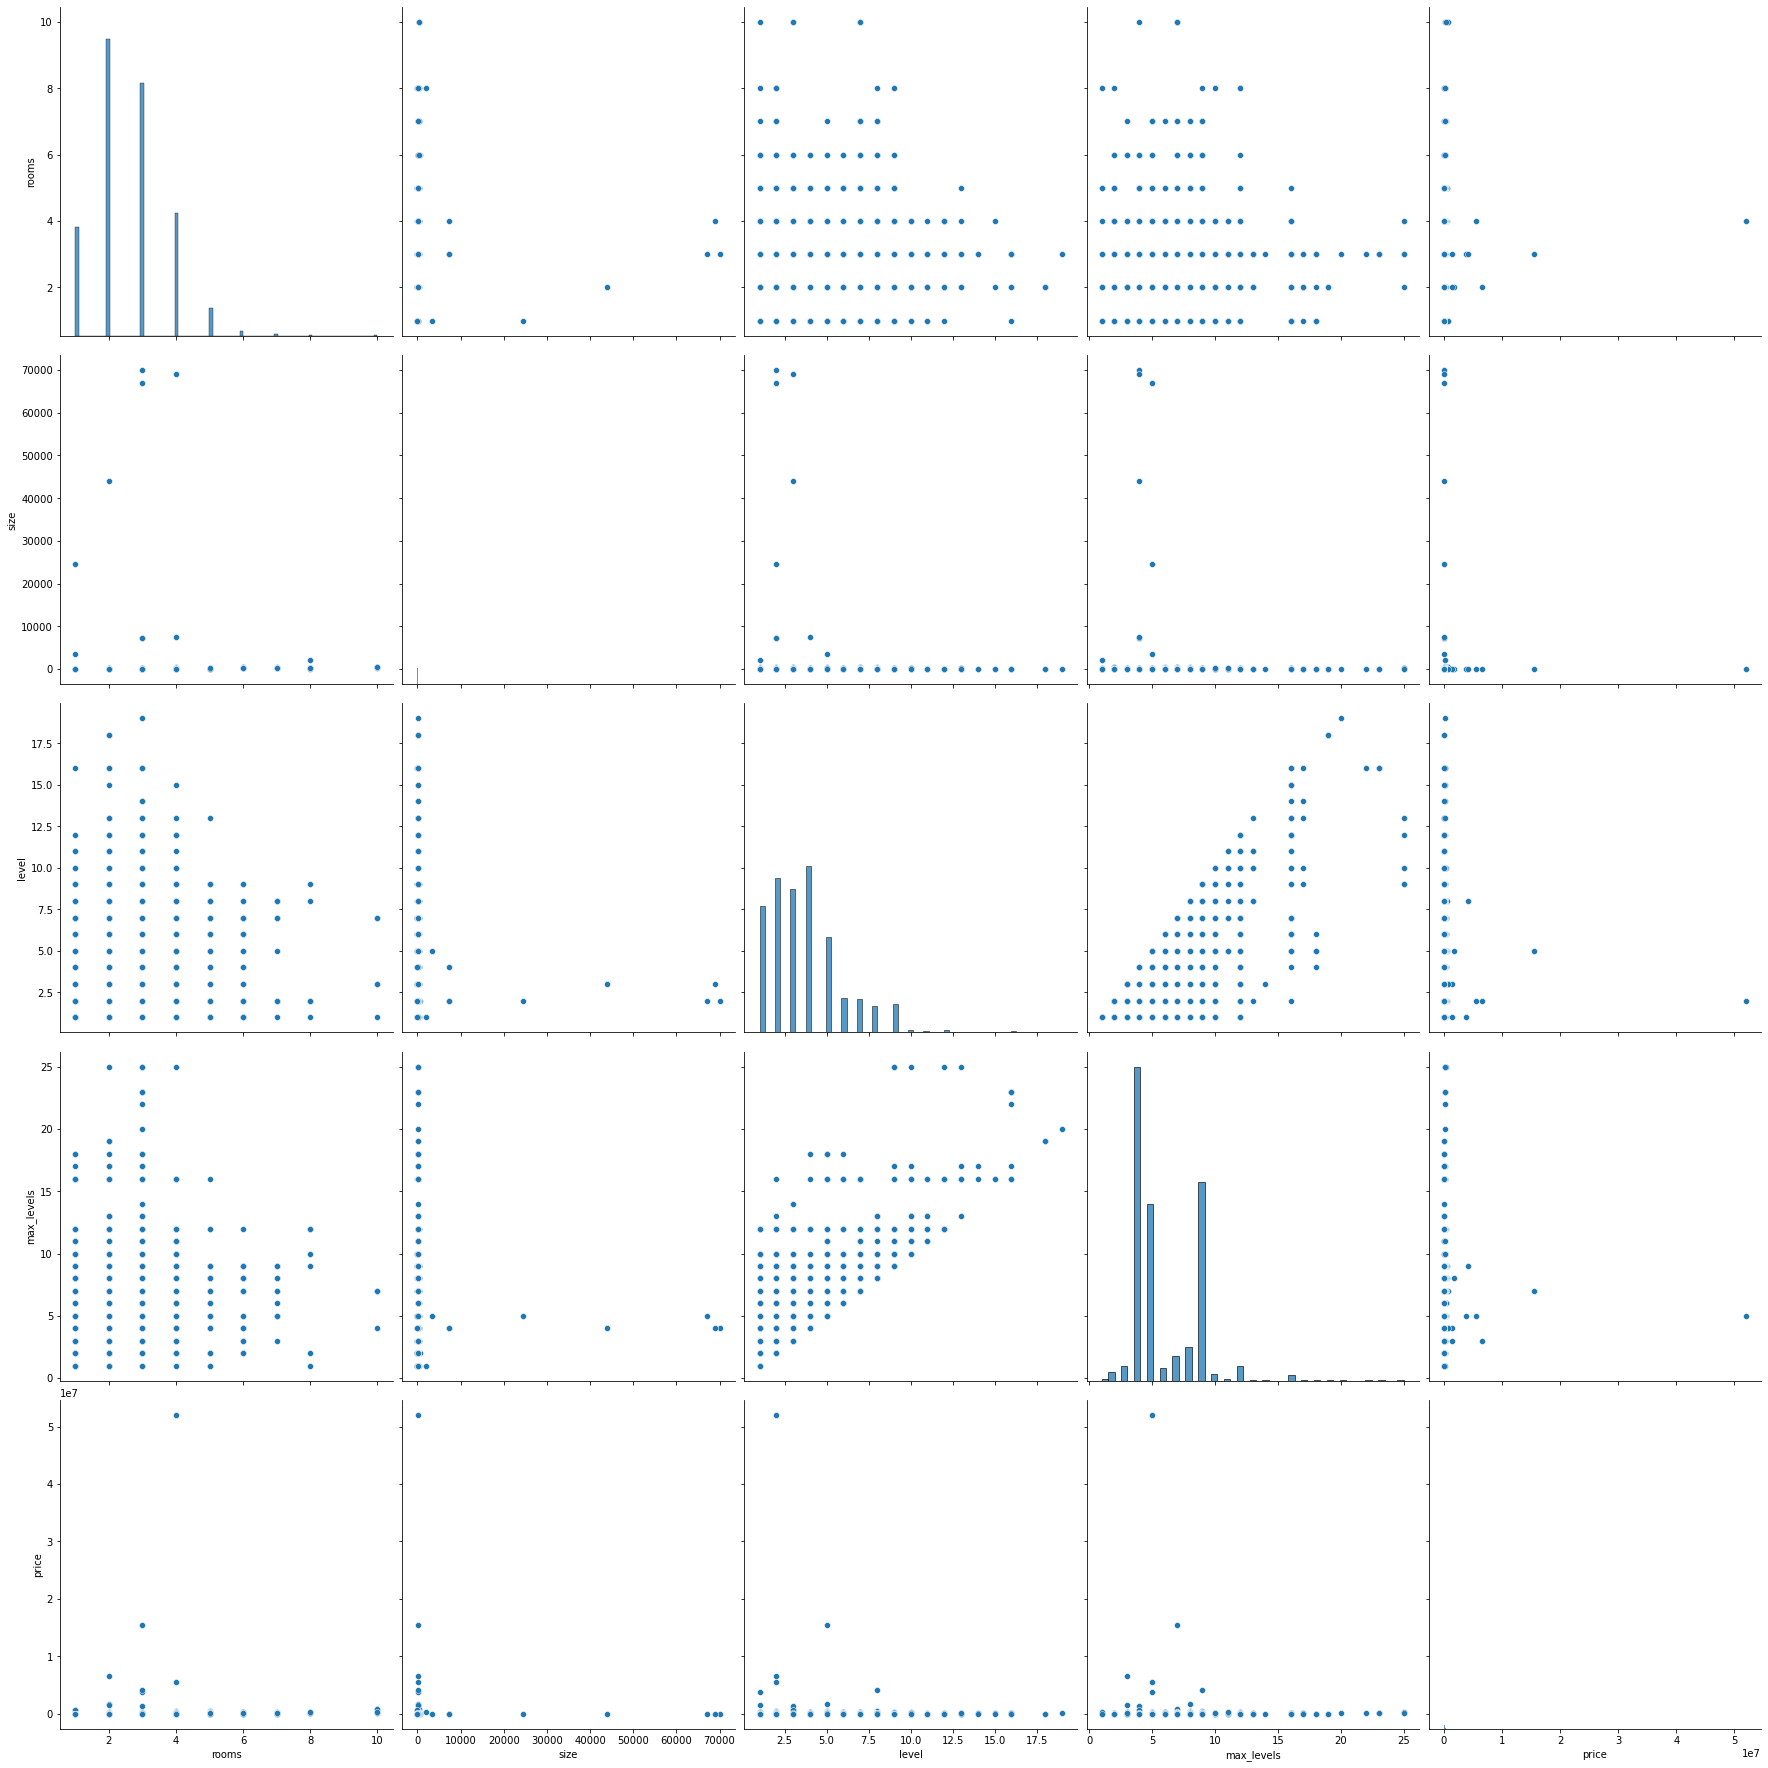

In [685]:
cols = ['rooms','size','level','max_levels',"price"]
sns.pairplot(df[cols], height=5)
plt.show()

In [688]:
df.corrwith(df["price"])
df["rooms_per_size"]=df["rooms"]/df["size"]

In [679]:
sonlar=list(range(1,7466))

In [742]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500
7561,Яшнободский,2,49.0,1,4,32000
7562,Шайхантахурский,2,64.0,3,9,40000
7563,Мирзо-Улугбекский,1,18.0,1,4,11000


In [743]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop("district", axis=1)

In [744]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

In [748]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [749]:
X_prepared = full_pipeline.fit_transform(X_train)

In [750]:
X_prepared[0:5,:]

array([[-0.57458889, -0.03523441,  0.12524471, -0.78114458,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.4952878 , -0.05655365, -1.20092799, -1.54042117,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.26680894,  0.00882535, -0.31681286, -0.40150628,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57458889, -0.03381313, -0.31681286,  1.11704692,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57458889, -0.04091954, -1

In [751]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [752]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [753]:
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
497,Мирзо-Улугбекский,2,40.0,5,5
349,Чиланзарский,5,98.0,5,9
7114,Чиланзарский,2,63.0,4,4
1609,Мирабадский,4,107.0,8,9
851,Шайхантахурский,1,41.0,5,9


In [754]:
test_label = y.loc[test_data.index]
test_label

497      31500
349      70000
7114     48500
1609    100000
851      31500
Name: price, dtype: int64

In [755]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-5.74588890e-01, -4.94472406e-02,  5.67302274e-01,
        -4.01506278e-01,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.18750785e+00, -8.23004300e-03,  5.67302274e-01,
         1.11704692e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.74588890e-01, -3.31024898e-02,  1.25244709e-01,
        -7.81144577e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.26680894e+00, -1.83427096e

In [756]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([ 38142.94611873, 115132.47970335,  34673.56016657, 115528.86614905,
        81263.25956383])

In [757]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
497,38142.946119,31500
349,115132.479703,70000
7114,34673.560167,48500
1609,115528.866149,100000
851,81263.259564,31500


In [759]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
2301,Яшнободский,3,86.0,4,9
6126,Учтепинский,3,70.0,2,5
2149,Яккасарайский,3,90.0,5,5
5594,Чиланзарский,1,36.0,2,4
6566,Учтепинский,4,100.0,1,4
...,...,...,...,...,...
6593,Шайхантахурский,3,80.0,6,9
4089,Шайхантахурский,6,500.0,2,2
441,Чиланзарский,1,36.0,2,5
5639,Шайхантахурский,3,70.0,6,7


In [761]:
y_test = test_set['price'].copy()
y_test

2301    89000
6126    43500
2149    45000
5594    24700
6566    87000
        ...  
6593    48000
4089     1800
441     28500
5639    60000
2538    42000
Name: price, Length: 1493, dtype: int64

In [762]:
X_test_prepared = full_pipeline.transform(X_test)

In [764]:
y_predicted = LR_model.predict(X_test_prepared)

In [765]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1366742.755611274


In [766]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [767]:
y_predicted = Tree_model.predict(X_test_prepared)

In [768]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1370153.7246288005


In [769]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [770]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1370433.8267313216


In [773]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [775]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [776]:
from sklearn.model_selection import cross_val_score

In [777]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [778]:
display_scores(LR_rmse_scores)

Scores: [  72555.73963232   46818.73106055  144429.71285792   42474.71976401
   48253.58258335   43527.84943424   52085.7886351  1901388.20302356
  166777.44610516  650092.90111387]
Mean: 316840.4674210096
Std.dev: 556676.7608983462


In [779]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  63929.17874203  289649.11719639  141595.8984623   208325.20447546
  156829.18722811   60384.32595794  565422.34516677 1907819.04797737
  634724.33920062  642724.77810265]
Mean: 467140.3422509649
Std.dev: 526585.1386882135
